# Make Geotiff file from database Earth2014 and SRTM90m

## Database

- [Earth2014](http://ddfe.curtin.edu.au/models/Earth2014/) (1 Arc‐min shape, topography, bedrock and ice‐sheet models)

  Here downloads [Earth2014.TBI2014.5min.geod.bin](http://ddfe.curtin.edu.au/models/Earth2014/data_5min/topo_grids/Earth2014.TBI2014.5min.geod.bin) and [Earth2014.TBI2014.1min.geod.bin](http://ddfe.curtin.edu.au/models/Earth2014/data_1min/topo_grids/Earth2014.TBI2014.1min.geod.bin)


- [SRTM](https://www.usgs.gov/centers/eros/science/usgs-eros-archive-digital-elevation-shuttle-radar-topography-mission-srtm-1-arc?qt-science_center_objects=0#qt-science_center_objects) (Shuttle Radar Topography Mission (SRTM) 1 Arc-Second Global)

  Here downloads the SRTM data (3 arc-second, 90m) of the three rivers region (Xmin = 88, Ymin =20, Xmax = 108, Ymax = 36) from [Opentopography](https://portal.opentopography.org/raster?opentopoID=OTSRTM.042013.4326.1).

In [1]:
import numpy as np
import os
import pyshtools as pysh
#import shapefile
from osgeo import gdal
from osgeo import osr

import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
from matplotlib.colors import LightSource
from mpl_toolkits.axes_grid1 import make_axes_locatable

import sys 
sys.path.append("..") 
from qixiang import functions as fnqx

### Earth2014

In [2]:
dir_db   = '../Data/earth2014/data_1min/topo_grids'
fname_db = 'Earth2014.TBI2014.1min.geod.bin' 
fname_save  = 'Earth2014.TBI2014.1min' 
order_db = 10800
res_deg = 1/60

# dir_db   = '../Data/earth2014/data_1min/topo_grids'
# fname_db = 'Earth2014.BED2014.1min.geod.bin' 
# fname_save  = 'Earth2014.BED2014.1min' 
# order_db = 10800
# res_deg = 1/60

# dir_db   = '../Data/earth2014/data_5min/topo_grids'
# fname_db = 'Earth2014.TBI2014.5min.geod.bin' 
# fname_save  = 'Earth2014.TBI2014.5min' 
# order_db = 2160
# res_deg = 5/60

fname_topo = os.path.join(dir_db,fname_db)

In [3]:
# This scirpt shows how to access the data grids of earth2014 model
# Source code: access_Earth2014_grids5min.m (Christian Hirt, Moritz Rexer)

# grid definitions
lats = np.arange((-90+res_deg/2),(90-res_deg/4),res_deg)
lons = np.arange((-180+res_deg/2),(180-res_deg/4),res_deg)
nlat = len(lats) 
nlon = len(lons)

minlon1,maxlon1,minlat1,maxlat1 = (lons.min(),lons.max(),lats.min(),lats.max())
global_extent = [minlon1,maxlon1,minlat1,maxlat1]

# read data
data_topo = np.fromfile(fname_topo, dtype='>i2').reshape((nlat, nlon))
data_topo = data_topo.astype(np.int16) # data = data.astype('<i2')
data_topo = np.flipud(data_topo)

# get SHCs
#topo = pysh.SHGrid.from_array(data_topo)
#coeffs = pysh.expand.SHExpandDH(topo.data, sampling=2)

In [4]:
# grid definitions of region

#name_area ='Tibet'
#extent_tibet = (65,110,15,45) # Tibet

name_area ='TRR'
extent_trr = (88,108,20,36)

# name_area = 'TRR2'
# extent_trr2 = (91, 106,21,35)

order_t = order_db

extent_area = extent_trr
#extent_area_r = fnqx.get_extent(extent_area,res_deg)
extent_area_r,data_area = fnqx.get_data(data_topo,extent_area,res_deg)

In [5]:
fname_data = '../data/dem/' + name_area + '_'+ fname_save + '.order'+ str(order_t)+ '.tif'
latRange = extent_area_r[2:5]
lonRange = extent_area_r[0:2]
dtype = gdal.GDT_Float32

fnqx.array2geotiff_yx(fname_data, data_area, latRange, lonRange, dtype)

In [6]:
# test the output file 

output_file=fname_data
!gdalinfo $output_file

Driver: GTiff/GeoTIFF
Files: ../Data/dem/TRR_Earth2014.TBI2014.1min.order10800.tif
Size is 1200, 960
Coordinate System is:
GEOGCRS["WGS 84",
    DATUM["World Geodetic System 1984",
        ELLIPSOID["WGS 84",6378137,298.257223563,
            LENGTHUNIT["metre",1]]],
    PRIMEM["Greenwich",0,
        ANGLEUNIT["degree",0.0174532925199433]],
    CS[ellipsoidal,2],
        AXIS["geodetic latitude (Lat)",north,
            ORDER[1],
            ANGLEUNIT["degree",0.0174532925199433]],
        AXIS["geodetic longitude (Lon)",east,
            ORDER[2],
            ANGLEUNIT["degree",0.0174532925199433]],
    ID["EPSG",4326]]
Data axis to CRS axis mapping: 2,1
Origin = (88.008333333546602,35.991666666659512)
Pixel Size = (0.016652777777791,-0.016649305555555)
Metadata:
  AREA_OR_POINT=Area
Image Structure Metadata:
  INTERLEAVE=BAND
Corner Coordinates:
Upper Left  (  88.0083333,  35.9916667) ( 88d 0'30.00"E, 35d59'30.00"N)
Lower Left  (  88.0083333,  20.0083333) ( 88d 0'30.00"E, 20d 0'30.00

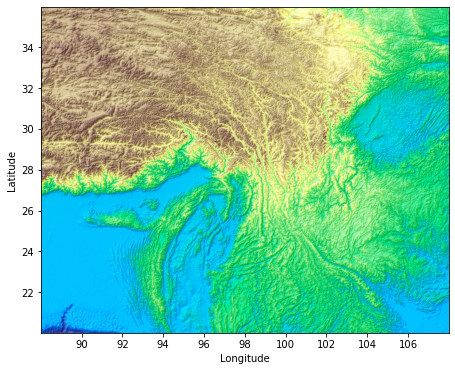

In [7]:
gtiff = gdal.Open(output_file)
# width = gtiff.RasterXSize
# height = gtiff.RasterYSize
# gt = gtiff.GetGeoTransform()
img = gtiff.GetRasterBand(1).ReadAsArray()


xticks_area = np.arange(-180,180+2,2)
yticks_area = np.arange(-90,90+2,2)
extent_img = extent_area_r
data_img = img


fig = plt.figure(figsize=(8, 6))
ax = plt.subplot(111)
ax.set(xlabel='Longitude', ylabel='Latitude', yticks=yticks_area, xticks=xticks_area)
# ax.axis('off')
ls = LightSource(azdeg=315, altdeg=45)
rgb = ls.shade(data_img, cmap=cm.terrain, blend_mode='soft', vert_exag=2., dx=50, dy=50)
im1 = ax.imshow(rgb, extent=extent_img, cmap=cm.terrain, origin='upper')
plt.show()

### SRTM

In [8]:
rescale = 20

input_file = "../data/Dem/TRR_SRTM.3s.tif"
gtiff = gdal.Open(input_file)
size_s = gtiff.RasterXSize
size_t = np.round(size_s/rescale).astype(int)

In [9]:
# project (resample) the SRTM data 
output_file = "../data/dem/TRR_SRTM.3s.size" + str(size_t) + ".tif"

#!gdalinfo --version
#!gdalinfo $input_file

proj_input = 'EPSG:4326'
# lat_0 = (Ymin+Ymax)/2 lon_0 = (Xmin+Xmax)/2 
#proj_output = "'+proj=tmerc +lat_0=29 +lon_0=100 +k=1 x_0=0 +y_0=0 +datum=WGS84 +units=m +no_defs'" 
proj_output = 'EPSG:4326'


!gdalwarp -s_srs $proj_input -t_srs $proj_output -ts $size_t 0 -r bilinear $input_file $output_file

Creating output file that is 1200P x 960L.
Processing ../Data/dem/TRR_SRTM.3s.tif [1/1] : 0Using internal nodata values (e.g. -32768) for image ../Data/dem/TRR_SRTM.3s.tif.
Copying nodata values from source ../Data/dem/TRR_SRTM.3s.tif to destination ../Data/dem/TRR_SRTM.3s.size1200.tif.
...10...20...30...40...50...60...70...80...90...100 - done.


In [10]:
# test the output file 

!gdalinfo $output_file

Driver: GTiff/GeoTIFF
Files: ../Data/dem/TRR_SRTM.3s.size1200.tif
Size is 1200, 960
Coordinate System is:
GEOGCRS["WGS 84",
    DATUM["World Geodetic System 1984",
        ELLIPSOID["WGS 84",6378137,298.257223563,
            LENGTHUNIT["metre",1]]],
    PRIMEM["Greenwich",0,
        ANGLEUNIT["degree",0.0174532925199433]],
    CS[ellipsoidal,2],
        AXIS["geodetic latitude (Lat)",north,
            ORDER[1],
            ANGLEUNIT["degree",0.0174532925199433]],
        AXIS["geodetic longitude (Lon)",east,
            ORDER[2],
            ANGLEUNIT["degree",0.0174532925199433]],
    ID["EPSG",4326]]
Data axis to CRS axis mapping: 2,1
Origin = (87.999583333272454,36.000416666672123)
Pixel Size = (0.016666666666663,-0.016666666666663)
Metadata:
  AREA_OR_POINT=Area
Image Structure Metadata:
  INTERLEAVE=BAND
Corner Coordinates:
Upper Left  (  87.9995833,  36.0004167) ( 87d59'58.50"E, 36d 0' 1.50"N)
Lower Left  (  87.9995833,  20.0004167) ( 87d59'58.50"E, 20d 0' 1.50"N)
Upper Right (

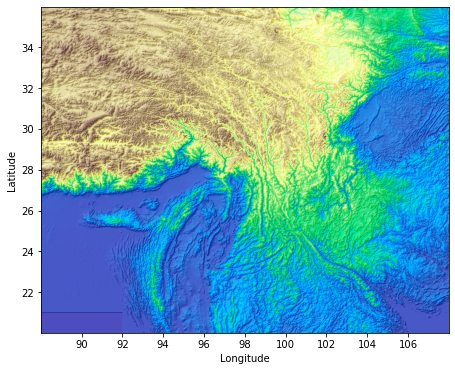

In [11]:
gtiff = gdal.Open(output_file)
# width = gtiff.RasterXSize
# height = gtiff.RasterYSize
# gt = gtiff.GetGeoTransform()
img = gtiff.GetRasterBand(1).ReadAsArray()

xticks_area = np.arange(-180,180+2,2)
yticks_area = np.arange(-90,90+2,2)
extent_img = extent_area_r
data_img = img

img[np.where(img<-100)]= -100


fig = plt.figure(figsize=(8, 6))
ax = plt.subplot(111)
ax.set(xlabel='Longitude', ylabel='Latitude', yticks=yticks_area, xticks=xticks_area)
# ax.axis('off')
ls = LightSource(azdeg=315, altdeg=45)
rgb = ls.shade(data_img, cmap=cm.terrain, blend_mode='soft', vert_exag=2., dx=50, dy=50)
im1 = ax.imshow(rgb, extent=extent_img, cmap=cm.terrain, origin='upper')
plt.show()